In [1]:
!python3 -m pip install SSIM-PIL

In [118]:
import glob
from SSIM_PIL import compare_ssim
from PIL import Image
import pandas as pd
from timeit import default_timer as timer
from tqdm.notebook import tqdm
from statistics import mean
import matplotlib.pyplot as plt

In [119]:
# Read the filenames
custom_dataset = glob.glob("Dataset/custom_dataset/*")
# Sort according to image numbers
custom_dataset.sort()

In [120]:
custom_dataset

['Dataset/custom_dataset/00.png',
 'Dataset/custom_dataset/01.png',
 'Dataset/custom_dataset/02.png',
 'Dataset/custom_dataset/03.png',
 'Dataset/custom_dataset/04.png',
 'Dataset/custom_dataset/05.png',
 'Dataset/custom_dataset/06.png',
 'Dataset/custom_dataset/07.png',
 'Dataset/custom_dataset/08.png',
 'Dataset/custom_dataset/09.png',
 'Dataset/custom_dataset/10.png',
 'Dataset/custom_dataset/11.png',
 'Dataset/custom_dataset/12.png',
 'Dataset/custom_dataset/13.png',
 'Dataset/custom_dataset/14.png',
 'Dataset/custom_dataset/15.png',
 'Dataset/custom_dataset/16.png',
 'Dataset/custom_dataset/17.png',
 'Dataset/custom_dataset/18.png',
 'Dataset/custom_dataset/19.png',
 'Dataset/custom_dataset/20.png',
 'Dataset/custom_dataset/21.png',
 'Dataset/custom_dataset/22.png',
 'Dataset/custom_dataset/23.png',
 'Dataset/custom_dataset/24.png',
 'Dataset/custom_dataset/25.png',
 'Dataset/custom_dataset/26.png',
 'Dataset/custom_dataset/27.png',
 'Dataset/custom_dataset/28.png',
 'Dataset/cust

In [121]:
dataset_rows = custom_dataset
dataset_columns = [filename for i, filename in enumerate(custom_dataset) if i%4 == 0]

In [122]:
df = pd.DataFrame(columns = dataset_columns, index = dataset_rows)

In [123]:
df

,Dataset/custom_dataset/00.png,Dataset/custom_dataset/04.png,Dataset/custom_dataset/08.png,Dataset/custom_dataset/12.png,Dataset/custom_dataset/16.png,Dataset/custom_dataset/20.png,Dataset/custom_dataset/24.png,Dataset/custom_dataset/28.png,Dataset/custom_dataset/32.png,Dataset/custom_dataset/36.png
Dataset/custom_dataset/00.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/01.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/02.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/03.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/04.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/05.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/06.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/07.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/08.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dataset/custom_dataset/09.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
time_list = []
for r, row in enumerate(tqdm(df.index)):
    image1 = Image.open(row)
    h1, w1 = image1.size
    image1 = image1.resize((int(h1/3), int(w1/3))) # to ease the computataion process
    for c, column in enumerate(tqdm(df.columns, leave=False)):
        if column != row: # so we dont compare the image to itself
            image2 = Image.open(column)
            image2 = image2.resize((int(h1/3), int(w1/3)))
            start_time = timer()
            
            #  Compare images using CPU-only version
            value = round(compare_ssim(image1, image2, GPU=False),4)
            
            end_time = timer()
            elapsed_time = end_time - start_time
            time_list.append(elapsed_time)
            df.loc[row, column] = value
            image2.close()
    image1.close()

In [125]:
df

,Dataset/custom_dataset/00.png,Dataset/custom_dataset/04.png,Dataset/custom_dataset/08.png,Dataset/custom_dataset/12.png,Dataset/custom_dataset/16.png,Dataset/custom_dataset/20.png,Dataset/custom_dataset/24.png,Dataset/custom_dataset/28.png,Dataset/custom_dataset/32.png,Dataset/custom_dataset/36.png
Dataset/custom_dataset/00.png,NaN,0.4814,0.564,0.508,0.4074,0.5567,0.4532,0.511,0.5802,0.5379
Dataset/custom_dataset/01.png,0.9495,0.4816,0.5635,0.5071,0.4078,0.5559,0.4531,0.5107,0.5808,0.5386
Dataset/custom_dataset/02.png,0.9155,0.4846,0.5621,0.5077,0.4095,0.5568,0.4546,0.5125,0.5811,0.5405
Dataset/custom_dataset/03.png,0.9076,0.4846,0.5619,0.5092,0.4092,0.555,0.4541,0.5137,0.5816,0.5411
Dataset/custom_dataset/04.png,0.4814,NaN,0.485,0.4261,0.4674,0.4391,0.4501,0.4163,0.4666,0.5443
Dataset/custom_dataset/05.png,0.4809,0.8692,0.4845,0.4265,0.4678,0.4388,0.4502,0.4168,0.4649,0.5419
Dataset/custom_dataset/06.png,0.4778,0.8245,0.484,0.4255,0.4669,0.4385,0.4479,0.4169,0.461,0.5347
Dataset/custom_dataset/07.png,0.4747,0.8068,0.4853,0.4235,0.4681,0.4379,0.4479,0.415,0.4598,0.5342
Dataset/custom_dataset/08.png,0.564,0.485,NaN,0.502,0.4061,0.5266,0.4351,0.4825,0.5322,0.5287
Dataset/custom_dataset/09.png,0.5635,0.4853,0.9422,0.5012,0.4054,0.5269,0.4347,0.482,0.5326,0.5296


In [126]:
SSIM_avg_time = round(mean(time_list),4)
SSIM_avg_time # in seconds

1.2519

In [127]:
df = df.fillna(0)

In [128]:
similar_images_dict = {}
for column in df.columns:
    similar_images_dict[column] = list(df.nlargest(n=3, columns=column)[column].index)

In [129]:
similar_images_dict

{'Dataset/custom_dataset/00.png': ['Dataset/custom_dataset/01.png',
  'Dataset/custom_dataset/02.png',
  'Dataset/custom_dataset/03.png'],
 'Dataset/custom_dataset/04.png': ['Dataset/custom_dataset/05.png',
  'Dataset/custom_dataset/06.png',
  'Dataset/custom_dataset/07.png'],
 'Dataset/custom_dataset/08.png': ['Dataset/custom_dataset/09.png',
  'Dataset/custom_dataset/10.png',
  'Dataset/custom_dataset/11.png'],
 'Dataset/custom_dataset/12.png': ['Dataset/custom_dataset/13.png',
  'Dataset/custom_dataset/15.png',
  'Dataset/custom_dataset/14.png'],
 'Dataset/custom_dataset/16.png': ['Dataset/custom_dataset/17.png',
  'Dataset/custom_dataset/18.png',
  'Dataset/custom_dataset/19.png'],
 'Dataset/custom_dataset/20.png': ['Dataset/custom_dataset/21.png',
  'Dataset/custom_dataset/23.png',
  'Dataset/custom_dataset/22.png'],
 'Dataset/custom_dataset/24.png': ['Dataset/custom_dataset/25.png',
  'Dataset/custom_dataset/26.png',
  'Dataset/custom_dataset/36.png'],
 'Dataset/custom_dataset/28

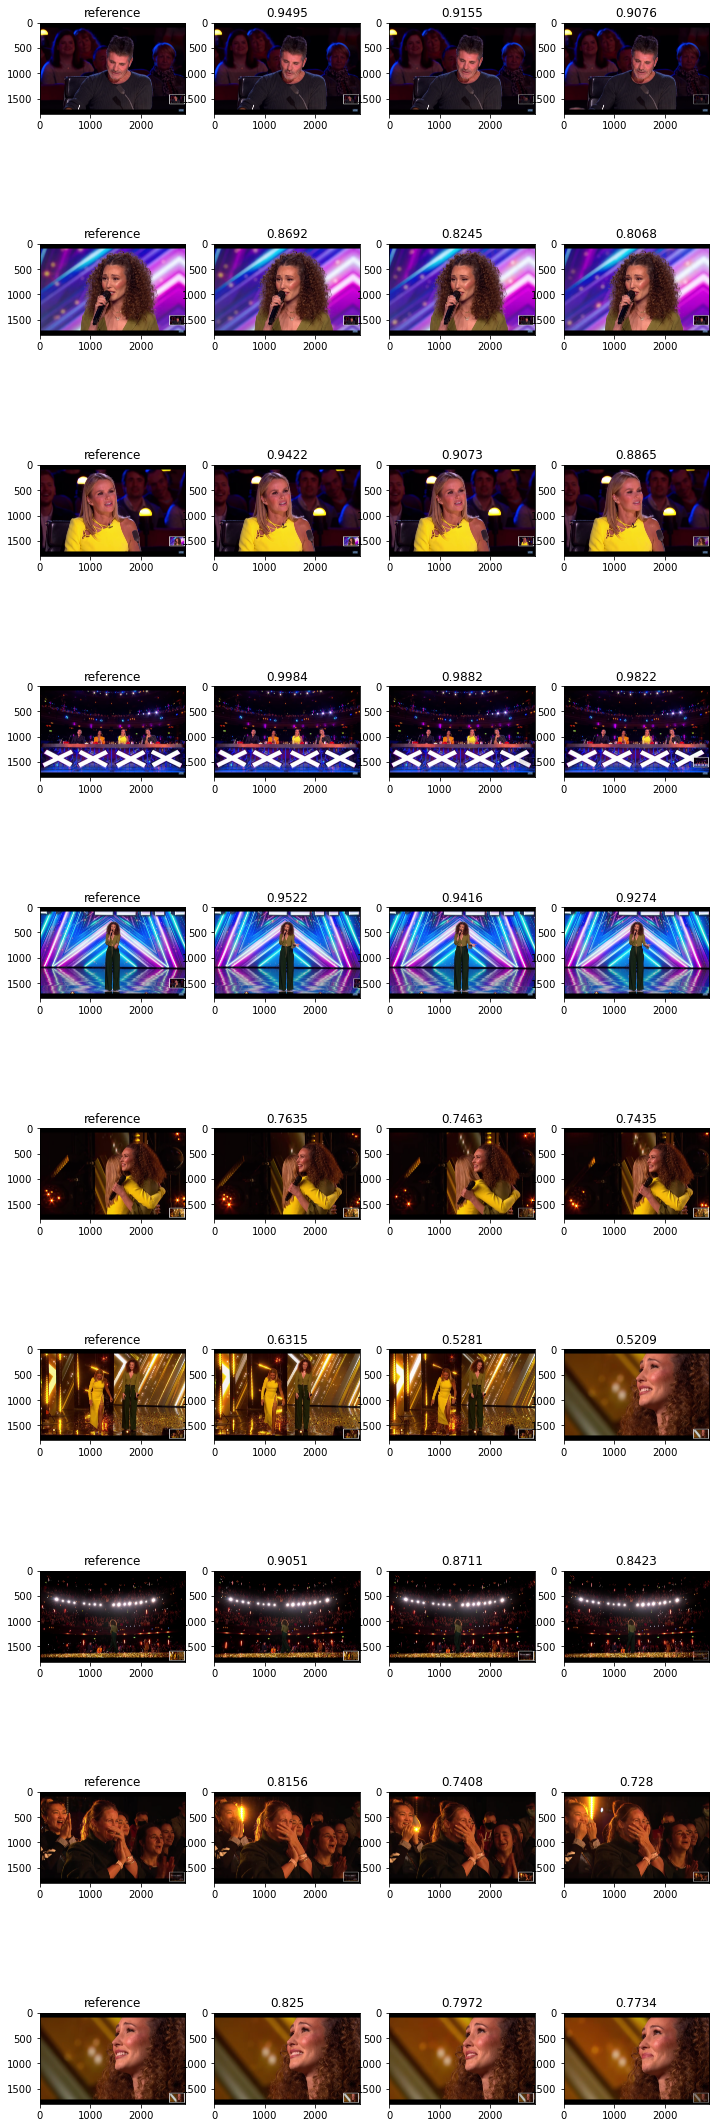

In [133]:
_, axs = plt.subplots(10, 4, figsize=(12, 40))
axs = axs.flatten()
i = 0
j = 1
for key, values in similar_images_dict.items():
    axs[i].imshow(Image.open(key))
    axs[i].title.set_text("reference")
    for value in values:
        axs[i+j].imshow(Image.open(value))
        axs[i+j].title.set_text(df.loc[value][key])
        i = i+j
    i += 1
plt.show()

In [117]:
accuracy = 0
for k,values in similar_images_dict.items():
    key_num = int(k[k.find("_dataset/")+len("_dataset/"):k.rfind(".png")])
    for v in values:
        value_num = int(v[v.find("_dataset/")+len("_dataset/"):v.rfind(".png")])
        if (value_num == key_num + 1) | (value_num == key_num + 2) | (value_num == key_num + 3):
            accuracy += 1
print(f"The accuracy is {accuracy/30*100}")

The accuracy is 100.0
